In [1]:
print("Twitter Sentiment Analysis Project Started")


Twitter Sentiment Analysis Project Started


In [4]:
!pip install pandas numpy matplotlib nltk scikit-learn wordcloud textblob



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Pandas is working!")


Pandas is working!


In [1]:
import pandas as pd

df = pd.read_csv("Tweets.csv")
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
df = df[['text', 'airline_sentiment']]
df.columns = ['text', 'sentiment']
df.head()


,text,sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [3]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\w+', '', text)      # remove usernames
    text = re.sub(r'http\S+', '', text)   # remove links
    text = re.sub(r'[^a-z\s]', '', text)  # remove symbols
    return text


In [5]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...


True

In [1]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


In [3]:
import pandas as pd

df = pd.read_csv("Tweets.csv")
df = df[['text', 'airline_sentiment']]
df.columns = ['text', 'sentiment']
df.head()


,text,sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [4]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['clean_text'] = df['text'].apply(clean_text)
df.head()


,text,sentiment,clean_text
0,@VirginAmerica What @dhepburn said.,neutral,what said
1,@VirginAmerica plus you've added commercials t...,positive,plus youve added commercials to the experienc...
2,@VirginAmerica I didn't today... Must mean I n...,neutral,i didnt today must mean i need to take anothe...
3,@VirginAmerica it's really aggressive to blast...,negative,its really aggressive to blast obnoxious ente...
4,@VirginAmerica and it's a really big bad thing...,negative,and its a really big bad thing about it


In [6]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [1]:
import pandas as pd

df = pd.read_csv("Tweets.csv")
df = df[['text', 'airline_sentiment']]
df.columns = ['text', 'sentiment']


In [2]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['clean_text'] = df['text'].apply(clean_text)


In [3]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

df['final_text'] = df['clean_text'].apply(preprocess)
df.head()


,text,sentiment,clean_text,final_text
0,@VirginAmerica What @dhepburn said.,neutral,what said,said
1,@VirginAmerica plus you've added commercials t...,positive,plus youve added commercials to the experienc...,plus youve added commercial experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,neutral,i didnt today must mean i need to take anothe...,didnt today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,negative,its really aggressive to blast obnoxious ente...,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,negative,and its a really big bad thing about it,really big bad thing


In [4]:
def preprocess(text):
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

df['final_text'] = df['clean_text'].apply(preprocess)


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)

X = vectorizer.fit_transform(df['final_text'])
y = df['sentiment']

print("TF-IDF done. Shape:", X.shape)


TF-IDF done. Shape: (14640, 3000)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Model trained successfully")


Model trained successfully


In [7]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

    negative       0.82      0.94      0.88      1889
     neutral       0.67      0.49      0.56       580
    positive       0.81      0.62      0.70       459

    accuracy                           0.80      2928
   macro avg       0.77      0.68      0.71      2928
weighted avg       0.79      0.80      0.79      2928

Confusion Matrix:

[[1772   84   33]
 [ 266  282   32]
 [ 120   56  283]]


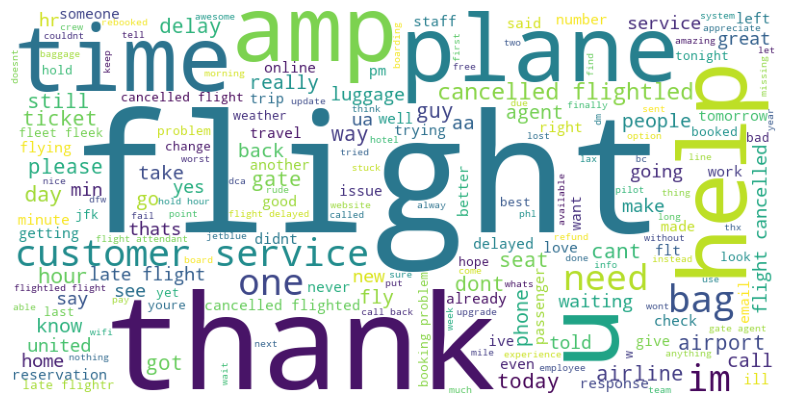

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = " ".join(df['final_text'])

wc = WordCloud(width=800, height=400, background_color="white").generate(all_words)

plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis("off")
plt.show()


In [28]:
df['sentiment'].value_counts()


sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [29]:
df.isnull().sum()


text          0
sentiment     0
clean_text    0
final_text    0
dtype: int64